In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

df = pd.read_csv(url, delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df.shape

(41188, 21)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No hay nigún valor nulo en el dataset

In [4]:
df.duplicated().sum()

np.int64(12)

In [5]:
df = df.drop_duplicates()

Voy a eliminar un par de variables que no me parecen relevantes, pero tal vez al final del analisis reevalue mi criterio.

In [6]:
procesed_data = df.drop(['month', 'day_of_week'], axis =1)
procesed_data

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


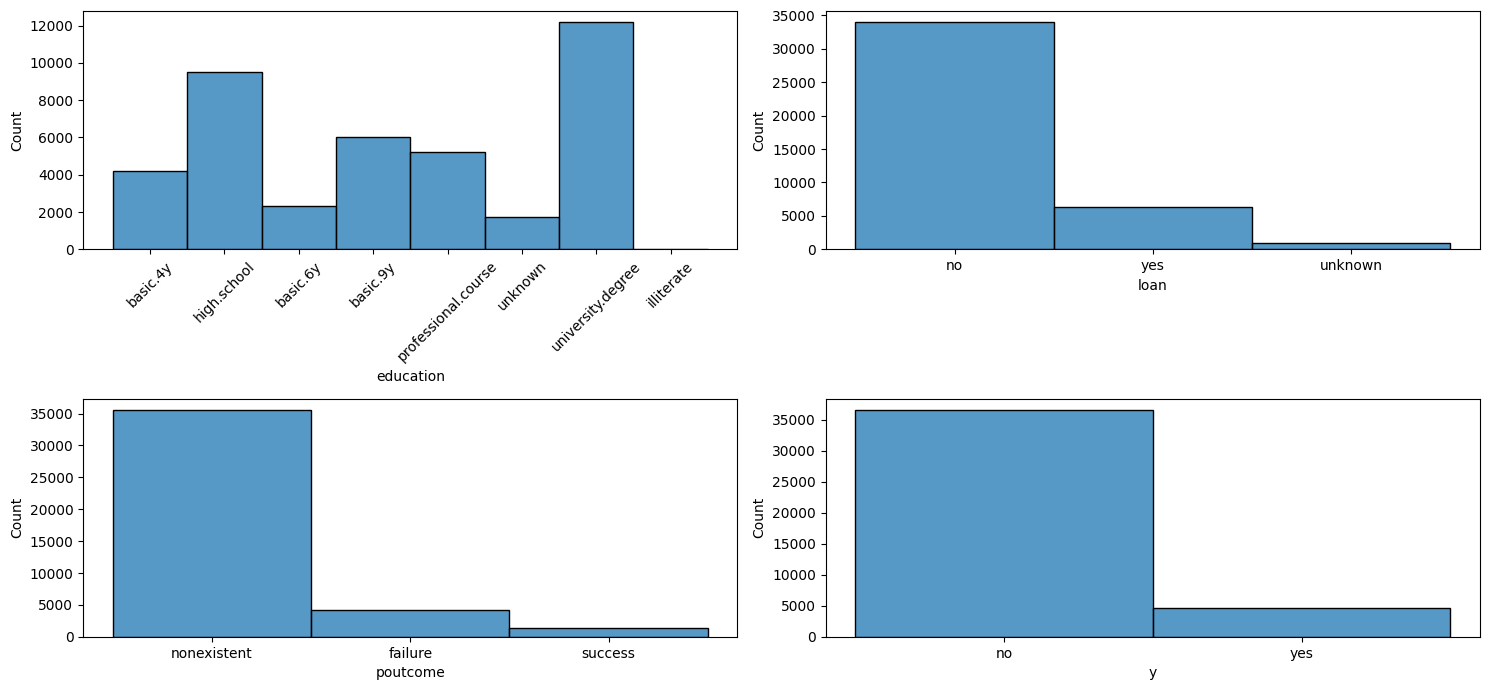

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.histplot(ax=axis[0,0], data =  procesed_data, x='education')
sns.histplot(ax=axis[0,1], data =  procesed_data, x='loan')
sns.histplot(ax=axis[1,0], data =  df, x='poutcome')
sns.histplot(ax=axis[1,1], data =  df, x='y')

axis[0, 0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='cons.conf.idx'>

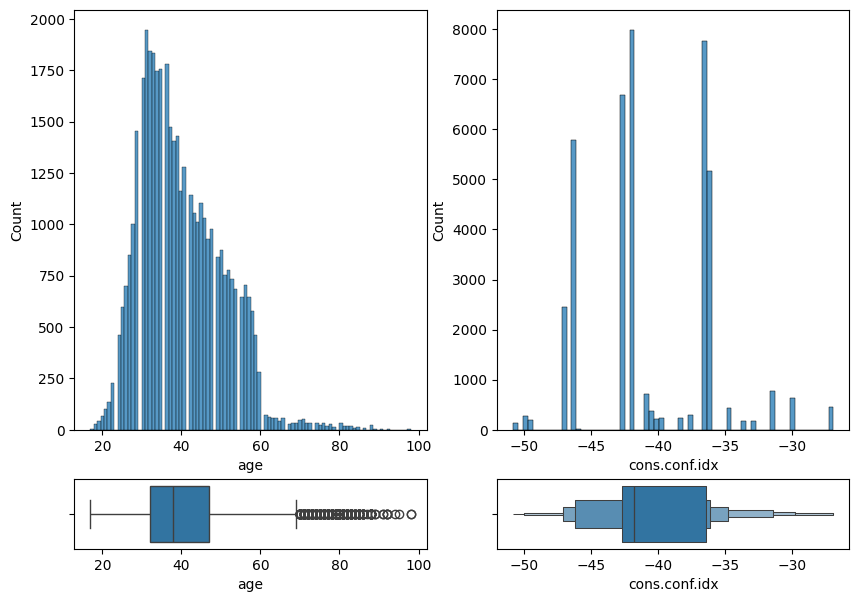

In [8]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax=axis[0,0], data=procesed_data, x='age')
sns.boxplot(ax=axis[1,0], data=procesed_data, x='age')
sns.histplot(ax=axis[0,1], data=procesed_data, x='cons.conf.idx')
sns.boxenplot(ax=axis[1,1], data=procesed_data, x='cons.conf.idx')

Matriz de correlación

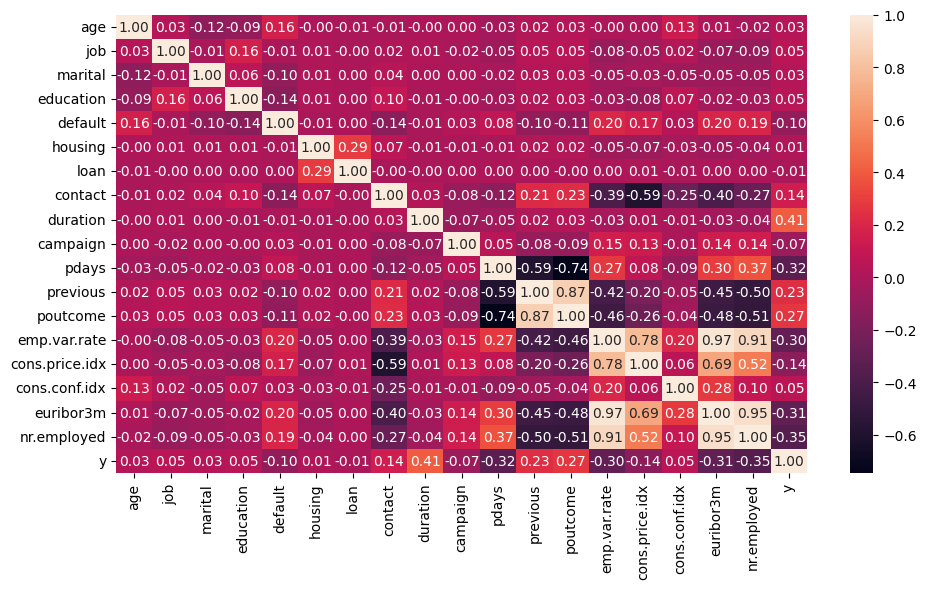

In [9]:
#Primero convertimos las variables categóricas a numéricas
procesed_data["job"] = pd.factorize(procesed_data["job"])[0]
procesed_data["marital"] = pd.factorize(procesed_data["marital"])[0]
procesed_data["education"] = pd.factorize(procesed_data["education"])[0]
procesed_data["default"] = pd.factorize(procesed_data["default"])[0]
procesed_data["housing"] = pd.factorize(procesed_data["housing"])[0]
procesed_data["loan"] = pd.factorize(procesed_data["loan"])[0]
procesed_data["contact"] = pd.factorize(procesed_data["contact"])[0]
procesed_data["poutcome"] = pd.factorize(procesed_data["poutcome"])[0]
procesed_data["y"] = pd.factorize(procesed_data["y"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(procesed_data[["age", "job", "marital", "education", "default", "housing", 'loan', 'contact', 'duration', 
                           'campaign', 'pdays', 'previous', 'poutcome','emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                             'euribor3m','nr.employed', 'y']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

La variable que más se relaciona de manera lineal con el tarjet es la 'duration' el Employment variation rate, el euribo, el Number of employees y Number of days, también tienen más de un 30% de correlación aunque inversa en este caso, el resto de variables 

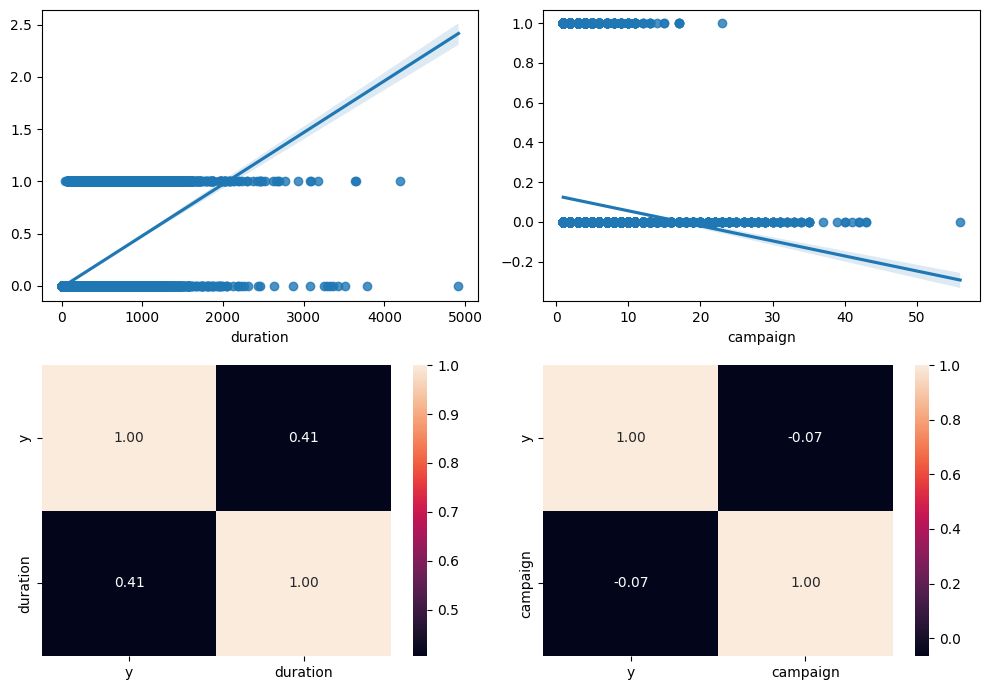

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = procesed_data, x = "duration", y = "y").set(ylabel=None)
sns.heatmap(procesed_data[["y", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])
sns.regplot(ax = axis[0, 1], data = procesed_data, x = "campaign", y = "y").set(ylabel=None)
sns.heatmap(procesed_data[["y", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

## Feature engineering

In [11]:
procesed_data.describe()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,258.315815,2.567879,962.464810,0.173013,0.169953,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,259.305321,2.770318,186.937102,0.494964,0.455811,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,319.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [12]:
procesed_data[['campaign', 'y']].sort_values(by='campaign', ascending=False)

,campaign,y
4107,56,0
13447,43,0
18728,43,0
4168,42,0
5304,42,0
...,...,...
22,1,0
41159,1,1
1,1,0
0,1,0


Respecto al número de contactos ('campaign') tanto en el gráfico anterior como en este se ve que a partir de 20 solo hay un dato que sea positivo, y a partir de 25 ninguno asique creo que se pueden eliminar todos estos outliers

In [13]:
campaign_data = procesed_data['campaign'].describe()

campaign_iqr = campaign_data["75%"] - campaign_data["25%"]
upper_limit = campaign_data["75%"] + 2 * campaign_iqr
lower_limit = campaign_data["25%"] - 2 * campaign_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(campaign_iqr, 2)}")

The upper and lower limits for finding outliers are 7.0 and -3.0, with an interquartile range of 2.0


Voy a eliminar a partir de 10 por ser un poco más conservador

In [14]:
procesed_data = procesed_data.loc[procesed_data['campaign'] < 10]

In [15]:
duration_data = procesed_data['duration'].describe()

duration_iqr = duration_data["75%"] - duration_data["25%"]
upper_limit = duration_data["75%"] + 2 * duration_iqr
lower_limit = duration_data["25%"] - 2 * duration_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(duration_iqr, 2)}")

The upper and lower limits for finding outliers are 756.0 and -329.0, with an interquartile range of 217.0


In [16]:
procesed_data = procesed_data.loc[procesed_data['campaign']< 800]

## Missing values

In [17]:
procesed_data.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No hay valores nulos

## Feature scaling

In [18]:
from sklearn.model_selection import train_test_split

num_variables = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']

X = procesed_data.drop("y", axis = 1)[num_variables]
y = procesed_data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5268,43,3,0,2,1,1,0,0,57,4,999,0,0,1.1,93.994,-36.4,4.857,5191.0
35107,36,10,0,3,0,1,0,1,251,1,999,0,0,-1.8,92.893,-46.2,1.250,5099.1
9474,32,0,1,0,0,1,1,0,123,1,999,0,0,1.4,94.465,-41.8,4.961,5228.1
3476,34,3,0,3,0,1,0,0,196,4,999,0,0,1.1,93.994,-36.4,4.860,5191.0
40602,59,1,0,4,0,1,0,1,251,3,2,4,2,-1.1,94.199,-37.5,0.883,4963.6


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #Usar la escala del training tanto para el training como para el test

X_train_norm = scaler.transform(X_train) 
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables) #Convertir los datos de nuevo en dataframe

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_test_norm

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
38716,-0.195792,-0.683530,-0.733943,1.243289,-0.510214,0.793737,-0.439879,0.751097,-0.758843,-0.758987,-5.112646,5.637718,3.986143,-2.192829,-1.583073,2.235689,-1.653342,-2.045693
37578,-1.152479,1.349321,-0.733943,0.326554,-0.510214,0.793737,-0.439879,0.751097,-0.271875,0.473574,0.196235,1.643431,1.804244,-1.875509,-2.356040,1.956484,-1.564912,-1.236715
18626,-0.578467,-1.090100,-0.733943,-1.048549,-0.510214,0.793737,-0.439879,0.751097,-0.403279,-0.758987,0.196235,-0.353712,-0.377656,0.853438,0.606425,-0.470454,0.788829,0.856706
14827,-1.056811,-0.683530,-0.733943,1.243289,-0.510214,0.793737,-0.439879,0.751097,-0.855464,4.171257,0.196235,-0.353712,-0.377656,0.853438,0.606425,-0.470454,0.782513,0.856706
26757,1.430577,0.942751,2.141479,1.243289,-0.510214,0.793737,-0.439879,0.751097,-0.391685,-0.758987,0.196235,-0.353712,-0.377656,-0.098520,-0.632392,-0.320113,0.276622,0.411561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38787,1.143570,-0.276960,0.703768,-0.131814,-0.510214,-1.053631,-0.439879,0.751097,1.973590,-0.142706,0.196235,-0.353712,-0.377656,-2.192829,-1.583073,2.235689,-1.653916,-2.045693
9888,0.473889,-0.276960,-0.733943,-0.590181,1.957730,0.793737,-0.439879,-1.331386,-0.793627,-0.758987,0.196235,-0.353712,-0.377656,0.853438,1.550204,-0.277158,0.783661,0.856706
38686,1.239239,0.942751,2.141479,1.243289,-0.510214,-1.053631,1.750295,0.751097,0.416064,-0.142706,-5.112646,1.643431,3.986143,-2.192829,-1.583073,2.235689,-1.652768,-2.045693
16930,0.282552,-0.276960,0.703768,-0.131814,-0.510214,-1.053631,-0.439879,-1.331386,-0.897977,1.089854,0.196235,-0.353712,-0.377656,0.853438,0.606425,-0.470454,0.785384,0.856706


In [20]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

#Dado el tipo de variables creo que usar mutual_info_regression es lo más adecuado y flexible pero existen multiples opciones

selection_model = SelectKBest(mutual_info_regression, k = 13)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test_norm.columns.values[ix])

X_train_sel.head()

,age,job,education,contact,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.282552,-0.276960,-0.590181,-1.331386,-0.785897,0.196235,-0.353712,-0.377656,0.663047,0.737554,0.882617,0.725091,0.345409
1,-0.387129,2.569032,-0.131814,0.751097,-0.036121,0.196235,-0.353712,-0.377656,-1.177406,-1.162082,-1.222161,-1.346133,-0.921117
2,-0.769804,-1.496671,-1.506916,-1.331386,-0.530819,0.196235,-0.353712,-0.377656,0.853438,1.550204,-0.277158,0.784810,0.856706
3,-0.578467,-0.276960,-0.131814,-1.331386,-0.248686,0.196235,-0.353712,-0.377656,0.663047,0.737554,0.882617,0.726813,0.345409
4,1.813252,-1.090100,0.326554,0.751097,-0.036121,-5.117977,7.634862,3.986143,-0.733159,1.091255,0.646367,-1.556873,-2.788519


## Logistic regresion

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sel, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test_sel)
print(y_pred)

[1 0 0 ... 1 0 0]


In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9038293626044656

Un 91% de aciertos me parece bastante elevado teniendo en cuenta que en el training ha habido problemas de convergencia.

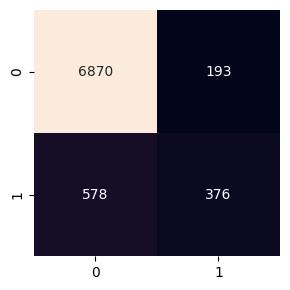

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

airbnb_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(airbnb_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Esta gráfica muestra mejor el comportamiento del modelo y por que el accuracy score puede ser engañoso en algunos casos.
Al ser la inmensa mayoría de los valores "0" el modelo puede obtener una precisión alta simplemente prediciendo "0" en casi todos los casos.
Pero de los casos interpretados como positivos "1" alrededor del 60% son falsos positivos y cerca de la mitad de los casos positivos fueron interpretados como negativos.
Esto me encaja con el problema de convergencia obtenido anteriormente

In [25]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [200, 250, 300, 500]
    }
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [200, 250, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [26]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_norm, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

KeyboardInterrupt: 

In [27]:
new_model = LogisticRegression(C=0.1, max_iter= 200, penalty ='l1', solver='liblinear')
new_model.fit(X_train_sel, y_train)
y_pred = new_model.predict(X_test_sel)

Ajustados los hyperparámetros el modelo si funciona, voy a comprobar ahora si se ha incrementado la precisión

In [28]:
accuracy_score(y_test, y_pred)

0.9035798927279531

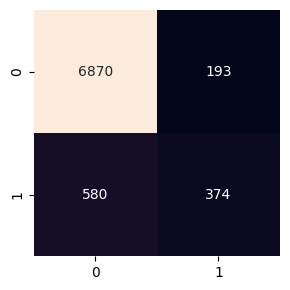

In [29]:
airbnb_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(airbnb_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

El modelo ha mejorado, apenas hay falsos negativos (54) y esta vez los TP (578) superan a los FP (376), aún así que el número de FP sea casí el 40% del total de positivos me sigue pareciendo elevado, voy a realizar pruebas distintas pruebas a ver si se puede incrementar la precision

## 1. Modelo Raw

Modelo entrenado sin editar nada del dataframe original

In [30]:
df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["contact"] = pd.factorize(df["contact"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]
df["y"] = pd.factorize(df["y"])[0]
df["month"] = pd.factorize(df["month"])[0]
df["day_of_week"] = pd.factorize(df["day_of_week"])[0]

In [31]:
num_variables = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

X = df.drop("y", axis = 1)[num_variables]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train) #Usar la escala del training tanto para el training como para el test

X_train_norm_raw = scaler.transform(X_train) 
X_train_norm_raw = pd.DataFrame(X_train_norm_raw, index = X_train.index, columns = num_variables) #Convertir los datos de nuevo en dataframe

X_test_norm_raw = scaler.transform(X_test)
X_test_norm_raw = pd.DataFrame(X_test_norm_raw, index = X_test.index, columns = num_variables)

In [32]:
raw_model = LogisticRegression(C=0.001, solver='newton-cg')
raw_model.fit(X_train_norm_raw, y_train)
y_pred = raw_model.predict(X_test_norm_raw)

In [33]:
accuracy_score(y_test, y_pred)

0.9008013598834386

El modelo sin editar tiene practicamente la misma precisión que el modelo tras el EDA, lo cual no habla muy bien de mi EDA 

## 2. Less features model

In [35]:
num_variables = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']

X = procesed_data.drop("y", axis = 1)[num_variables]
y = procesed_data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
selection_model = SelectKBest(mutual_info_regression, k = 5)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test_norm.columns.values[ix])

lf_model = LogisticRegression(C=0.001, solver='newton-cg')
lf_model.fit(X_train_sel, y_train)
y_pred = lf_model.predict(X_test_sel)

accuracy_score(y_test, y_pred)

0.8947237121117625

In [37]:
selection_model = SelectKBest(mutual_info_regression, k = 8)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test_norm.columns.values[ix])

lf_model = LogisticRegression(C=0.001, solver='newton-cg')
lf_model.fit(X_train_sel, y_train)
y_pred = lf_model.predict(X_test_sel)

accuracy_score(y_test, y_pred)

0.9024572782836473

In [39]:
selection_model = SelectKBest(mutual_info_regression, k = 10)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test_norm.columns.values[ix])

lf_model = LogisticRegression(C=0.001, solver='newton-cg')
lf_model.fit(X_train_sel, y_train)
y_pred = lf_model.predict(X_test_sel)

accuracy_score(y_test, y_pred)

0.902956218036672

In [40]:
selection_model = SelectKBest(mutual_info_regression, k = 15)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test_norm.columns.values[ix])

lf_model = LogisticRegression(C=0.001, solver='newton-cg')
lf_model.fit(X_train_sel, y_train)
y_pred = lf_model.predict(X_test_sel)

accuracy_score(y_test, y_pred)

0.9038293626044656

In [41]:
selection_model = SelectKBest(mutual_info_regression, k = 18)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test_norm.columns.values[ix])

lf_model = LogisticRegression(C=0.001, solver='newton-cg')
lf_model.fit(X_train_sel, y_train)
y_pred = lf_model.predict(X_test_sel)

accuracy_score(y_test, y_pred)

0.9040788324809779

El modelo no parece cambiar demasiado modificando el número de features, hubo un ligero empeoramiento al coger solo 5 features, pero por lo demás apenas varía.